# Gráficas de dispersión

<p style='text-align: justify;'>Las <b><font color = green>gráficas de dispersión</font></b> es la representación visual de una colección de puntos colocados en un plano utilizando coordenadas cartesianas que representan los valores de dos variables. Al mostrar una variable en cada eje, se puede detectar si existe una relación o correlación entre las dos variables.</p>
<br>
<center><img src="img/Dispersion1.png" width = "70%"></center>
<br>
<p style='text-align: justify;'>En nuestro primer ejemplo de gráficas de dispersión cada uno de los puntos representa a un alumno diferente y su coordenada en la gráfica representa la intersección entre las horas que estudio para prepararse para su examen y el resultado que obtuvo después de presentarlo.</p> 
<br>
<p style='text-align: justify;'>A primera vista es muy posible que se infiera una relación favorable entre estudiar muchas horas y obtener buenas calificaciones, pero existen algunos casos donde lo anterior no siempre se deba cumplir. En nuestro ejemplo también se puede observar que existe un alumno que estudio solamente dos horas y aún así logro obtener una de las calificaciones más altas dentro del conjunto de alumnos.</p> 
<br>
<p style='text-align: justify;'>Las gráficas de dispersión no solo permiten al observador encontrar relaciones entre los datos, sino que también permiten que se identifiquen fácilmente los datos que no se comportan de manera similar a la población.</p>


In [1]:
import pandas as pd

Industria de las peliculas
(Tres decadas de cine)
<br>
https://www.kaggle.com/danielgrijalvas/movies

In [2]:
df = pd.read_csv('data/movies/movies.csv')

In [3]:
df = pd.read_csv('data/movies/movies.csv', encoding = "cp1252")

In [4]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [6]:
df = df.drop(df[df['budget'] == 0].index)

In [7]:
df.describe()

,budget,gross,runtime,score,votes,year
count,4.638000e+03,4.638000e+03,4638.000000,4638.000000,4.638000e+03,4638.000000
mean,3.614560e+07,4.607469e+07,107.595515,6.356317,9.570254e+04,2002.489435
std,3.996947e+07,6.629378e+07,18.022792,1.011063,1.493878e+05,8.461472
min,6.000000e+03,3.090000e+02,69.000000,1.500000,1.830000e+02,1986.000000
25%,1.000000e+07,6.290905e+06,96.000000,5.800000,1.611050e+04,1996.000000
50%,2.300000e+07,2.345551e+07,104.000000,6.400000,4.394000e+04,2003.000000
75%,4.600000e+07,5.778243e+07,117.000000,7.100000,1.093932e+05,2010.000000
max,3.000000e+08,9.366622e+08,280.000000,9.300000,1.861666e+06,2016.000000


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

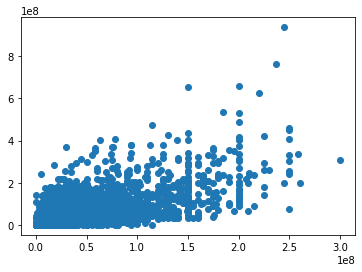

In [9]:
plt.scatter(df['budget'],df['gross'])

### Retorno de la Inversión
**ROI = (Beneficio – Inversión) / Inversión**

In [10]:
df['roi'] = (df['gross']-df['budget']) / df['budget']

df = df[ (df['roi']>1.5) & (df['score']>7.0) & (df['budget']>0.5e8)]

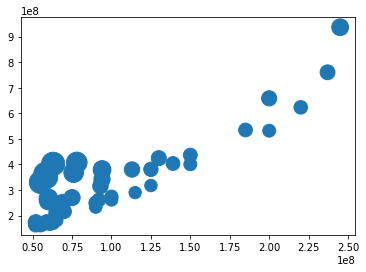

In [11]:
plt.scatter(df['budget'],df['gross'], s=df['roi']*100)

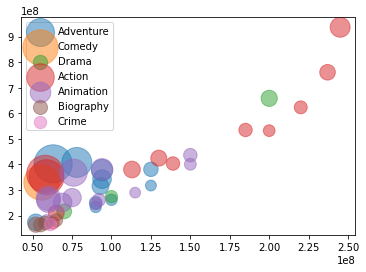

In [12]:
for genre in df['genre'].unique():
    data = df[df['genre'] == genre]
    plt.scatter(data['budget'],data['gross'],
                s=50*data['roi']**2,
                alpha = 0.5,
                label=genre)
plt.legend()

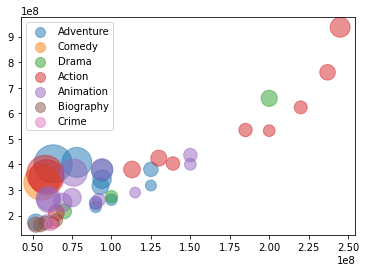

In [13]:
for genre in df['genre'].unique():
    data = df[df['genre'] == genre]
    plt.scatter(data['budget'],
                data['gross'],
                s=50*data['roi']**2,
                alpha = 0.5,
                label=genre)
    
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100])

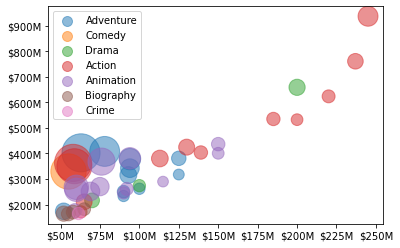

In [14]:
from matplotlib.ticker import FuncFormatter ###---

fig, ax = plt.subplots() ###---

for genre in df['genre'].unique():
    data = df[df['genre'] == genre]
    plt.scatter(data['budget'],
                data['gross'],
                s=50*data['roi']**2,
                alpha = 0.5,
                label=genre)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100])
    
    
def millions(x, pos):
    return '${:1.0f}M'.format(x*1e-6)

formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)


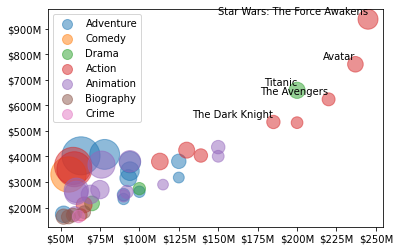

In [15]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()

for genre in df['genre'].unique():
    data = df[df['genre'] == genre]
    plt.scatter(data['budget'],
                data['gross'],
                s=50*data['roi']**2,
                alpha = 0.5,
                label=genre)

    
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100])
    
def millions(x, pos):
    return '${:1.0f}M'.format(x*1e-6)

formatter = FuncFormatter(millions)
# fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)


best_movies = df.sort_values('gross',ascending=False).head(5)
for index, row in best_movies.iterrows():
    plt.annotate(row['name'],
                 (row['budget'], row['gross']),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='right')

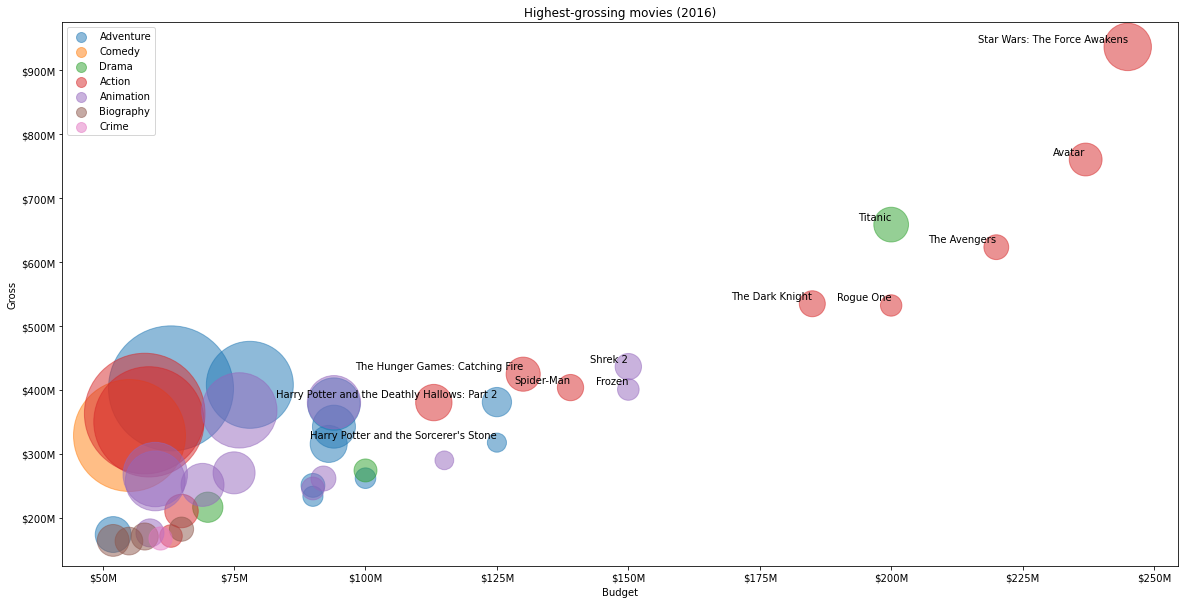

In [16]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(20,10)) ##---

for genre in df['genre'].unique():
    data = df[df['genre'] == genre]
    plt.scatter(data['budget'],
                data['gross'],
                s=100*data['roi']**3,
                alpha = 0.5,
                label=genre)

    
lgnd = plt.legend()

##---
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Highest-grossing movies (2016)')

for handle in lgnd.legendHandles:
    handle.set_sizes([100])
    
def millions(x, pos):
    return '${:1.0f}M'.format(x*1e-6)

formatter = FuncFormatter(millions)
# fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)


best_movies = df.sort_values('budget',ascending=False).head(12)
for index, row in best_movies.iterrows():
    plt.annotate(row['name'],
                 (row['budget'], row['gross']),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='right')
plt.savefig("dispersion.png",dpi=300)